# Lab 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from IPython.display import display, Math
from scipy.special import sici

In [2]:
def dm(eq):
    display(Math(eq))

## Исходные функции

In [3]:
def g1(x):
    return x*np.exp(x)

def g2(x):
    return x**2 * np.sin(3*x)

def g3(x):
    return np.sin(np.pi / x)

## Численное дифференцирование

In [4]:
x0_g1 = 3
x0_g3 = 0.01
eps = sys.float_info.epsilon
low_border = -16
high_border = 0

# Границы графика
h_values = np.logspace(-16, 0, 70, endpoint=True)

### Формулы численного дифференцирования

In [5]:
# Первая проивзодная 2-го порядка точности
def diff2(x_0, h, f):
    return (f(x_0 + h) - f(x_0 - h)) / (2 * h)

# Первая проивзодная 4-го порядка точности
def diff4(x_0, h, f):
    return (f(x_0 - 2*h) - 8*f(x_0 - h) + 8*f(x_0 + h) - f(x_0 + 2*h))/(12*h)

### Аналитические выражения для производных

In [6]:
def g1_derivative(x):
    return (x+1)*np.exp(x)

def g1_third_derivative(x):
    return (x+3)*np.exp(x)

def g1_fifth_derivative(x):
    return (x+5)*np.exp(x)

# ---------------------------------------------------
def g2_fourth_derivative(x):
    return 27 * (3 * x**2 * np.sin(3 * x) - 8 * x * np.cos(3 * x) - 4 * np.sin(3 * x))

# ---------------------------------------------------
def g3_derivative(x):
    return -np.pi * np.cos(np.pi/x) / (x**2)

def g3_third_derivative(x):
    return (np.pi * ((np.pi**2 - 6 * x**2) * np.cos(np.pi/x) + 6* np.pi * x * np.sin(np.pi/x)))/x**6

def g3_fourth_derivative(x):
    return (np.pi *(np.pi *(np.pi**2 - 36*x**2) * np.sin(np.pi/x) - 12*x*(np.pi**2 - 2*x**2)* np.cos(np.pi/x)))/x**8

def g3_fifth_derivative(x):
    return -(np.pi * (20 * np.pi * x *(np.pi**2 - 12 * x**2) * np.sin(np.pi/x) + (120 * x**4 - 120 * np.pi**2 * x**2 + np.pi**4) * np.cos(np.pi/x)))/x**10

### Численная погрешность методов численного дифференцирования

In [7]:
def error_machine_O2(h):
    return eps / h

def error_machine_O4(h):
    return (3 * eps)/(2 * h)

### Погрешность метода численного дифференцирования

In [8]:
def error_method_O2(x_0, h, third_derivative):
    interval_a_b = np.arange(x_0 - h, x_0 + h, 0.1)
    M = [np.abs(third_derivative(x)) for x in interval_a_b]
    return (h**2) * max(M) / 6

def error_method_O4(x_0, h, fifth_derivative):
    interval_a_b = np.arange(x_0 - h, x_0 + h, 0.1)
    M = [np.abs(fifth_derivative(x)) for x in interval_a_b]
    return (h**4) * max(M) / 30

### Численное дифференцирование фунции $g_1(x) = xe^x$

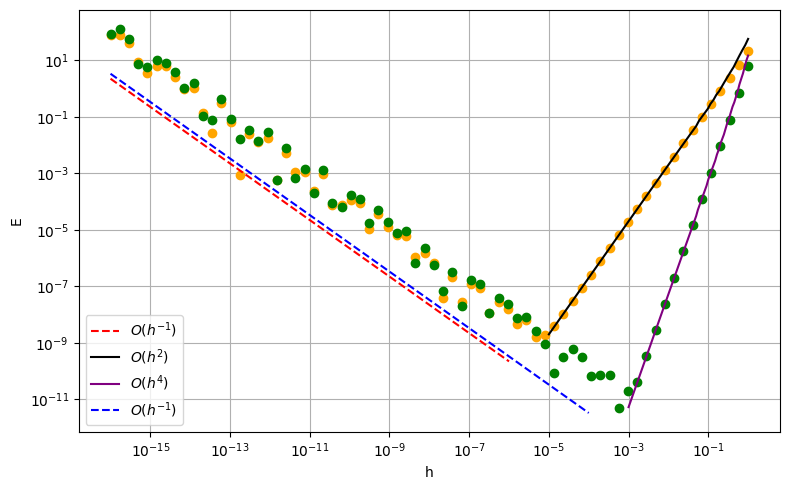

In [9]:
g1_exact = g1_derivative(x0_g1)

g1_diff2 = [diff2(x0_g1, h, g1) for h in h_values]
g1_diff4 = [diff4(x0_g1, h, g1) for h in h_values]

g1_errors_2 = np.abs(np.array(g1_diff2) - g1_exact)
g1_errors_4 = np.abs(np.array(g1_diff4) - g1_exact)

h_M_2 = np.logspace(low_border, -6, 70)
h_M_4 = np.logspace(low_border, -4, 70)
h_O_2 = np.logspace(-5, high_border, 70)
h_O_4 = np.logspace(-3, high_border, 70)

O_2 = [error_method_O2(x0_g1, h_value, g1_third_derivative) for h_value in h_O_2]
O_4 = [error_method_O4(x0_g1, h_value, g1_fifth_derivative) for h_value in h_O_4]
M_2 = [error_machine_O2(h) for h in h_M_2]
M_4 = [error_machine_O4(h) for h in h_M_4]

fig = plt.figure(figsize=(8, 5))

plt.loglog(h_values, g1_errors_2, 'o', color='orange')
plt.loglog(h_values, g1_errors_4, 'o', color='green')

plt.loglog(h_M_2, M_2, '--', color='red', label='$O(h^{-1})$')
plt.loglog(h_O_2, O_2, color='black', label='$O(h^2)$')

plt.loglog(h_O_4, O_4, color='purple', label='$O(h^4)$')
plt.loglog(h_M_4, M_4, '--', color='blue', label='$O(h^{-1})$')

plt.legend()
plt.xlabel('h')
plt.ylabel('E')
plt.grid(True)
fig.tight_layout()
plt.savefig('g1_error.png')
plt.show()

### Численное дифференцирование функции $g_3(x) = sin(\frac{π}{x})$

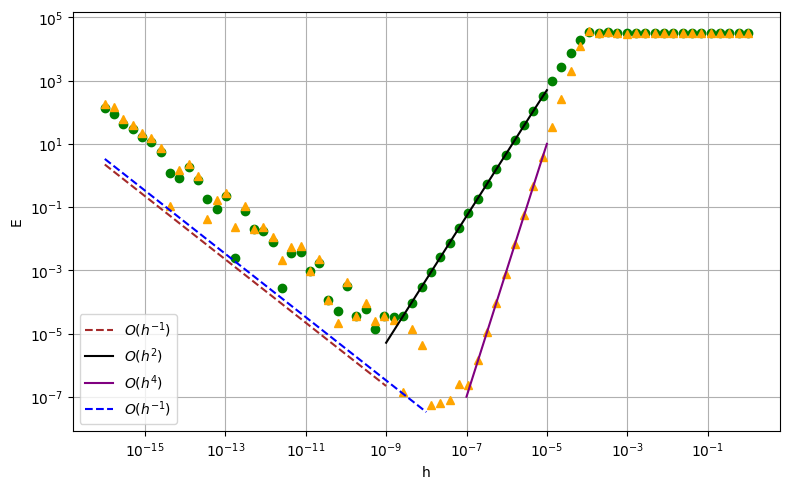

In [10]:
g3_exact = g3_derivative(x0_g3)

g3_diff2 = [diff2(x0_g3, h, g3) for h in h_values]
g3_diff4 = [diff4(x0_g3, h, g3) for h in h_values]

g3_errors_2 = np.abs(np.array(g3_diff2) - g3_exact)
g3_errors_4 = np.abs(np.array(g3_diff4) - g3_exact)

h_M_2 = np.logspace(low_border, -9, 70)
h_M_4 = np.logspace(low_border, -8, 70)
h_O_2 = np.logspace(-9, -5, 70)
h_O_4 = np.logspace(-7, -5, 70)

O_2 = [error_method_O2(x0_g3, h_value, g3_third_derivative) for h_value in h_O_2]
O_4 = [error_method_O4(x0_g3, h_value, g3_fifth_derivative) for h_value in h_O_4]
M_2 = [error_machine_O2(h) for h in h_M_2]
M_4 = [error_machine_O4(h) for h in h_M_4]

fig = plt.figure(figsize=(8, 5))

plt.loglog(h_values, g3_errors_2, 'o', color='green')
plt.loglog(h_values, g3_errors_4, '^', color='orange')

plt.loglog(h_M_2, M_2, '--', color='brown', label='$O(h^{-1})$')
plt.loglog(h_O_2, O_2, color='black', label='$O(h^2)$')

plt.loglog(h_O_4, O_4, color='purple', label='$O(h^4)$')
plt.loglog(h_M_4, M_4, '--', color='blue', label='$O(h^{-1})$')

plt.legend()
plt.xlabel('h')
plt.ylabel('E')
plt.grid(True)
fig.tight_layout()
plt.savefig('g3_error.png', dpi=400)
plt.show()

## Численное интегрирование

In [11]:
low_border = 2**3
high_border = 2**13

def definite_integral_f(a, b, integral_func):
    return integral_func(b) - integral_func(a)

### Составная формула Симпсона для интегрирования функции от $a$ до $b$ с $n$ узлами

In [12]:
def composite_simpson(a, b, n, f) :
    h = (b - a) / (n-1)
    x = [a + i * h for i in range(n)]

    sum_odd = sum(f(x[i]) for i in range(1, n-1, 2))
    sum_even = sum(f(x[i]) for i in range(2, n-1, 2))

    integral = (h / 3) * (f(a) + 4 * sum_odd + 2 * sum_even + f(b))
    # print(f"Ready integral when n = {n} is {integral}")
    return integral

### Аналитические значения интегралов

In [13]:
def integral_g1(x):
    return (2 * x * np.sin(3 * x)) / 9 - ((9 * x**2 - 2) * np.cos(3 * x)) / 27

def integral_g3(x):
    s, ci = sici(np.pi / x)  # s = Si(z), ci = Ci(z)
    return x * np.sin(np.pi / x) - np.pi * ci

### Погрешности численного интегрирования

In [14]:
def error_method(a, b, n, diff_f):
    h = (b - a) / n
    interval_a_b = np.arange(a, b)
    M = [np.abs(diff_f(x_i)) for x_i in interval_a_b]
    return (b - a) * (h**4) * max(M) / 180

def absolute_error(a, b, n, f, definite_integral_f, num_integral_f, integral_gX):
    definite = definite_integral_f(a, b, integral_gX)
    num_integral = num_integral_f(a, b, n, f)
    # print(f"definite integral: {definite}")
    # print(f"num integral: {num_integral}")
    return np.abs(definite_integral_f(a, b, integral_gX) - num_integral_f(a, b, n, f))

### Численное интегрирование функции $g_2(x) = x^2sin(3x)$ на отрезке $[0, π]$

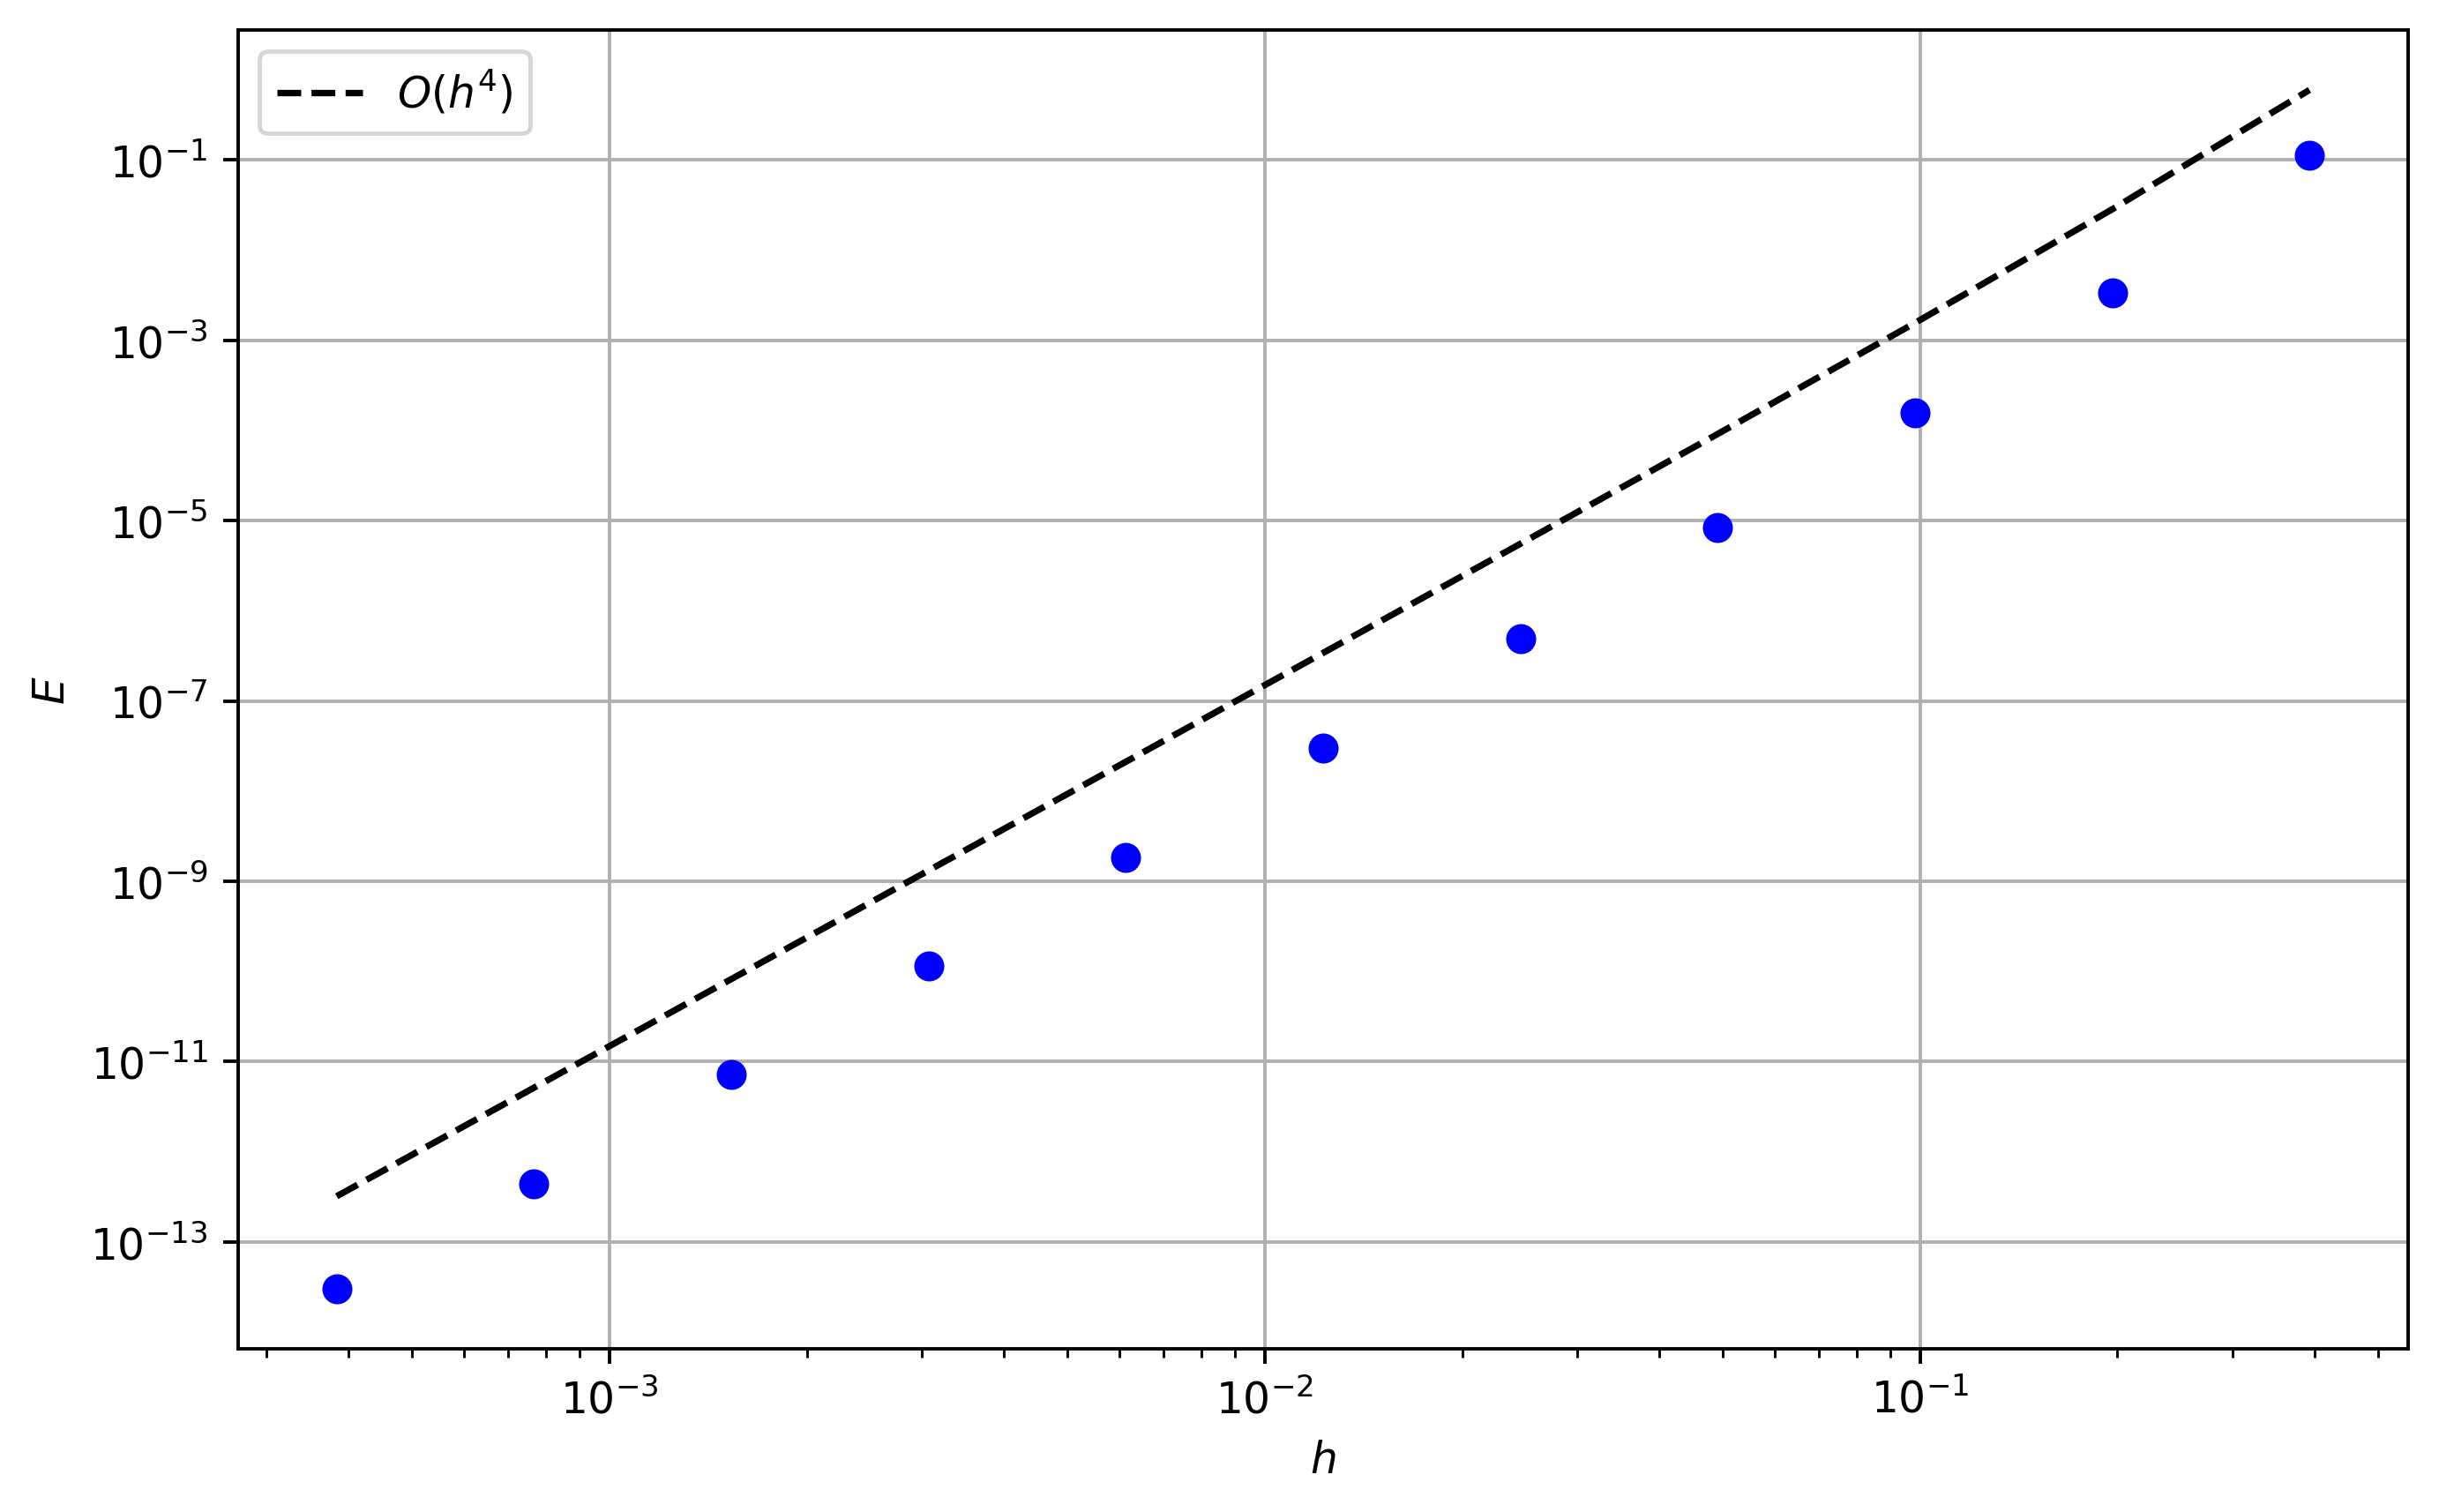

In [15]:
# n = np.logspace(np.log2(low_border), np.log2(high_border), 12, True, 2, int)
# h = [(b - a) / n_i for n_i in reversed(n)]
# n_o = np.logspace(2, 13, 12, True, 2, int)
# h_o = [(b - a) / n_i for n_i in reversed(n_o)]

a = 0
b = np.pi

n = np.logspace(np.log2(low_border), np.log2(high_border), 11, True, 2, int) - 1
h = [(b - a) / (n_i+1) for n_i in reversed(n)]
n_o = np.logspace(3, 13, 11, True, 2, int) - 1
h_o = [(b - a) / (n_i+1) for n_i in reversed(n_o)]

E = [absolute_error(a, b, int(n_i), g2, definite_integral_f, composite_simpson, integral_g1) for n_i in reversed(n)]
O = [error_method(a, b, int(n_i), g2_fourth_derivative) for n_i in reversed(n_o)]

plt.figure(figsize=(8, 5), dpi=350)
plt.loglog(h, E, 'o', color="blue")
plt.loglog(h_o, O, linestyle = "--", color="black", label="$O({h^4})$")
plt.xlabel('$h$')
plt.ylabel('$E$')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.savefig('g2_integral_uzly.png')
plt.show()

### Численное интегрирование функции $g_3(x) = sin(\frac{π}{x})$ на отрезке $[0.005, 1]$

In [16]:
a = 0.005
b = 1

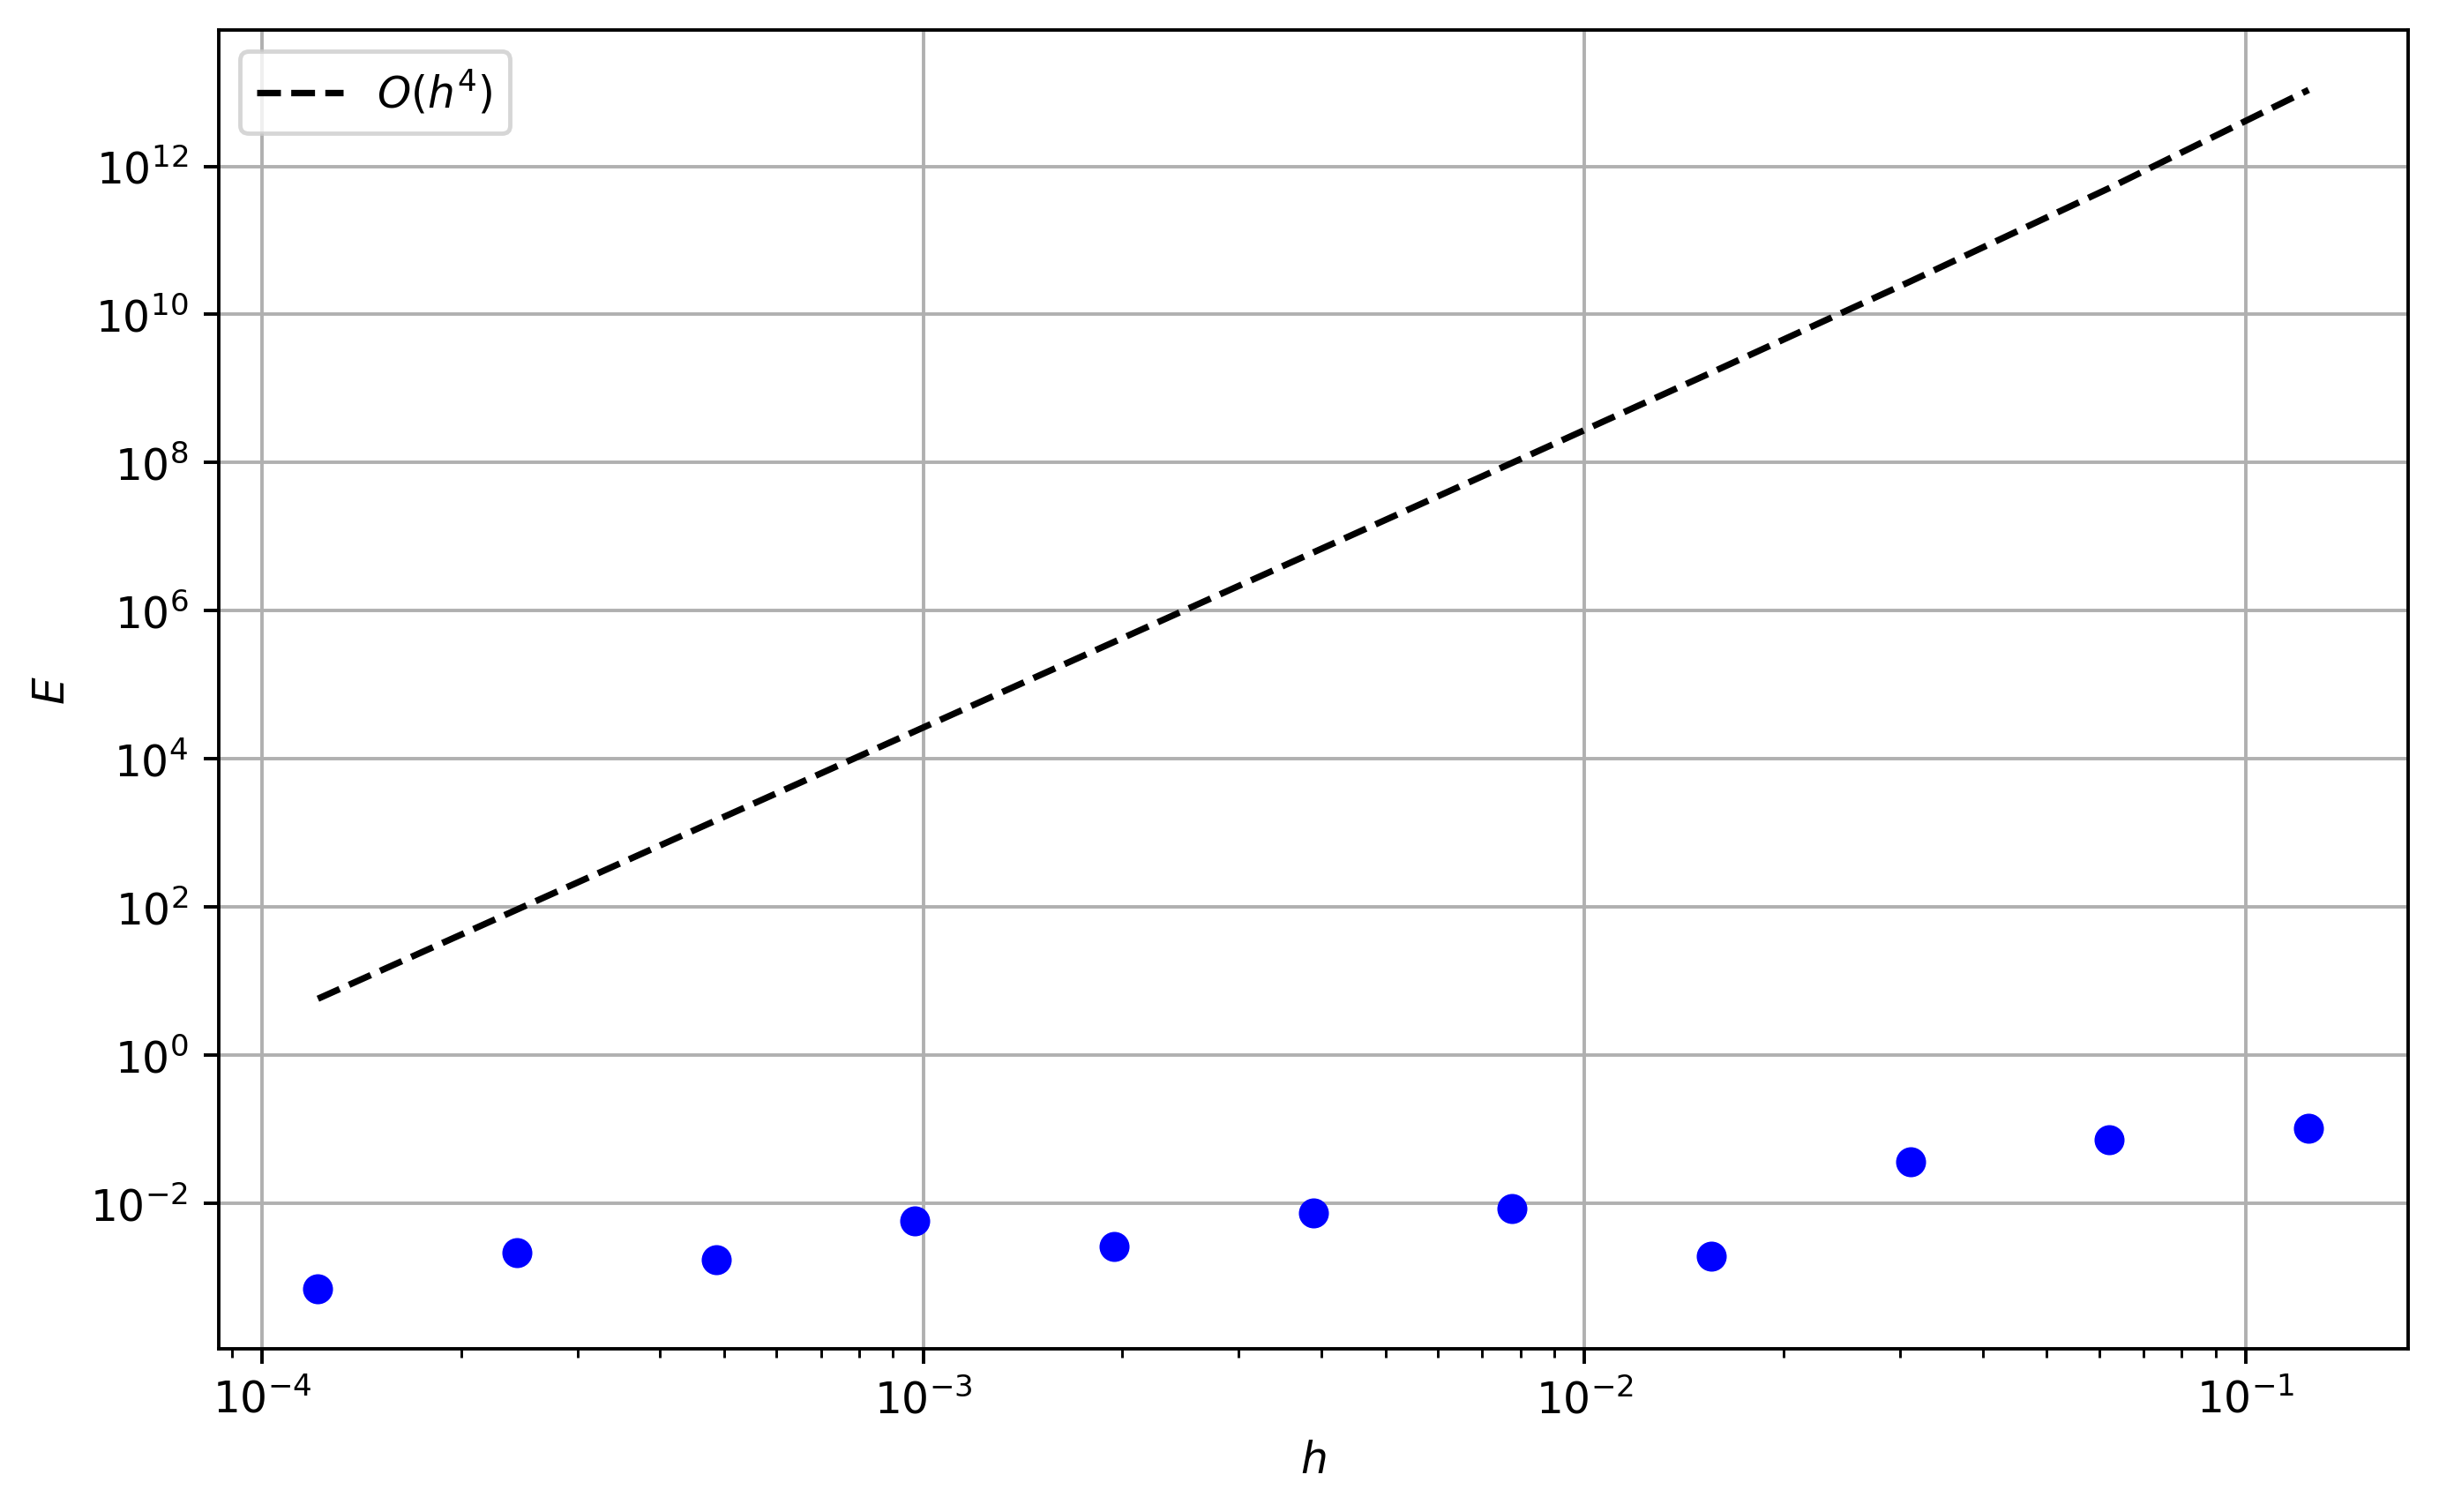

In [17]:
n = np.logspace(np.log2(low_border), np.log2(high_border), 11, True, 2, int) - 1
h = [(b - a) / (n_i+1) for n_i in reversed(n)]
n_o = np.logspace(3, 13, 11, True, 2, int) - 1
h_o = [(b - a) / (n_i+1) for n_i in reversed(n_o)]

E = [absolute_error(a, b, int(n_i), g3, definite_integral_f, composite_simpson, integral_g3) for n_i in reversed(n)]
O = [error_method(a, b, int(n_i), g3_fourth_derivative) for n_i in reversed(n_o)]

plt.figure(figsize=(8, 5), dpi=350)
plt.loglog(h, E, 'o', color="blue")
plt.loglog(h_o, O, linestyle = "--", color="black", label="$O({h^4})$")
plt.xlabel('$h$')
plt.ylabel('$E$')
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.savefig('g3_integral_uzly.png')
plt.show()

## Квадратура Гаусса

### Формула квадратуры Гаусса 5-го порядка точности

In [18]:
# Квадратура Гаусса 5-го порядка точности
def gauss_quad5(f):
    x = np.array([1.0, 1.0 + np.sqrt(3/5), 1.0 - np.sqrt(3/5)])
    c = np.array([8/9, 5/9, 5/9])
    
    integral = np.sum(c * f(x))
    return integral

### Значение полинома в точке x и вычисление его интеграла

In [19]:
def analytical_integral(poly_coeffs, a=0, b=2):
    integral = 0.0
    for power, coeff in enumerate(poly_coeffs):
        integral += coeff * (b**(power + 1) - a**(power + 1)) / (power + 1)
    return integral

### Генерация случайных полиномов

In [20]:
analytical_results = []
gauss_results = []
absolute_errors = []

max_degree = 6
random_coef = [int(rand) for rand in 10 * np.random.randn(max_degree+1)]
for d in range(7):
    display(Math(f'P_{d}(x) = '+ ' + '.join(f'{random_coef[i]}x^{i}' for i in range(0, d + 1))))

for degree in range(max_degree + 1):
    current_coeffs = random_coef[:degree + 1]
    poly = np.polynomial.Polynomial(current_coeffs)
        
    exact = analytical_integral(current_coeffs)
    numerical = gauss_quad5(poly)
    error = np.abs(exact - numerical)
        
    analytical_results.append(round(exact, 3))
    gauss_results.append(round(numerical, 3))
    absolute_errors.append(round(error, 3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [21]:
polynomial_names = [f'P_{i}' for i in range(7)]

dataframe_results = pd.DataFrame([
    polynomial_names,
    analytical_results,
    gauss_results
], index=['Полиномы', 'Результаты аналитической формулы', 'Результаты формулы квадратуры Гаусса'])

dataframe_abs = pd.DataFrame([
    polynomial_names,
    absolute_errors
], index=['Полиномы', 'Абсолютная погрешность'])

display(dataframe_results)
display(dataframe_abs)

,0,1,2,3,4,5,6
Полиномы,P_0,P_1,P_2,P_3,P_4,P_5,P_6
Результаты аналитической формулы,-10.0,-32.0,-32.0,-32.0,-51.2,-115.2,-133.486
Результаты формулы квадратуры Гаусса,-10.0,-32.0,-32.0,-32.0,-51.2,-115.2,-133.44


,0,1,2,3,4,5,6
Полиномы,P_0,P_1,P_2,P_3,P_4,P_5,P_6
Абсолютная погрешность,0.0,0.0,0.0,0.0,0.0,0.0,0.046
